# 01 Frame the Problem

Problem statement link :https://www.kaggle.com/c/movie-review-sentiment-analysis-kernels-only/overview


# 02 Obtain the data

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sampleSubmission.csv to sampleSubmission (1).csv
User uploaded file "sampleSubmission.csv" with length 596647 bytes


In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.tsv to train (1).tsv
User uploaded file "train.tsv" with length 8481022 bytes


In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving test.tsv to test (1).tsv
User uploaded file "test.tsv" with length 3367149 bytes


In [0]:
import pandas as pd
import numpy as np

In [0]:
df1 = pd.read_csv('sampleSubmission.csv')
df2 = pd.read_csv('train.tsv', sep = '\t')
df3 = pd.read_csv('test.tsv', sep= '\t')

# 03 Analyze The data

In [0]:
df1.head(5)

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2


In [0]:
df2.head(5)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [0]:
df3.head(5)

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [0]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [0]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
PhraseId      66292 non-null int64
SentenceId    66292 non-null int64
Phrase        66292 non-null object
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [0]:
df2['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [0]:
df2[df2['Sentiment']==1]['Phrase'].head(3)

0     A series of escapades demonstrating the adage ...
33    the gander , some of which occasionally amuses...
47         but none of which amounts to much of a story
Name: Phrase, dtype: object

In [0]:
df2.loc[df2.SentenceId ==2]

,PhraseId,SentenceId,Phrase,Sentiment
63,64,2,"This quiet , introspective and entertaining in...",4
64,65,2,"This quiet , introspective and entertaining in...",3
65,66,2,This,2
66,67,2,"quiet , introspective and entertaining indepen...",4
67,68,2,"quiet , introspective and entertaining",3
68,69,2,quiet,2
69,70,2,", introspective and entertaining",3
70,71,2,introspective and entertaining,3
71,72,2,introspective and,3
72,73,2,introspective,2


In [0]:
from textblob import TextBlob


In [0]:
#regular expression 
import re 

#regular expression for the removal of name tags and the emoticons from tweets.
def process(Phrase):
    return " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])", " ",Phrase.lower()).split())

In [0]:
#Applying the Process function to the given Train Data
df2['Newphrase']= df2['Phrase'].apply(process)

In [0]:
df2['Newphrase'][4]

'series'

In [0]:

df2['polarity'] = df2['Newphrase'].map(lambda text: TextBlob(text).sentiment.polarity)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns


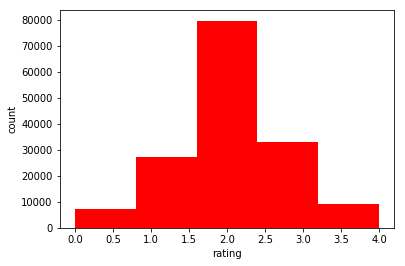

In [0]:
z = df2['Sentiment']
plt.hist(z, bins=5,color='Red')
plt.ylabel('count')
plt.xlabel('rating')
plt.show()

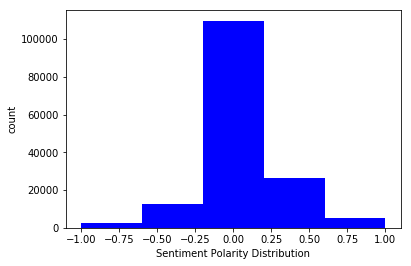

In [0]:
x = df2['polarity']
plt.hist(x, bins=5,color='blue')
plt.ylabel('count')
plt.xlabel('Sentiment Polarity Distribution')
plt.show()

In [0]:
pip install cufflinks --upgrade 

Requirement already up-to-date: cufflinks in /usr/local/lib/python3.6/dist-packages (0.16)


In [0]:
import plotly.tools as tls
import plotly.plotly as py



In [0]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [0]:
df2['Sentiment'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Review Rating Distribution')

#04 Feature Enginnering

In [0]:
df2.head(5)

,PhraseId,SentenceId,Phrase,Sentiment,Newphrase
0,1,1,A series of escapades demonstrating the adage ...,1,a series of escapades demonstrating the adage ...
1,2,1,A series of escapades demonstrating the adage ...,2,a series of escapades demonstrating the adage ...
2,3,1,A series,2,a series
3,4,1,A,2,a
4,5,1,series,2,series


In [0]:
 df2.drop('Phrase',inplace=True,axis=1)

In [0]:
df2.drop('PhraseId', inplace=True,axis=1)

#05 Model Selection

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier


In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Sentiment     156060 non-null int64
Newphrase     156060 non-null object
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [0]:
#splitting the data into random train and test subsets
x_train, x_test, y_train, y_test = train_test_split(df2["Sentiment"],df2['Newphrase'],
                                                    test_size = 0.2, random_state = 42)

In [0]:
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
                      ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier(n_estimators=200)),])
text = text_clf.fit(x_train,y_train)

AttributeError: ignored

#2nd model

In [0]:
count_vect = CountVectorizer(stop_words='english',ngram_range=(1,3),analyzer='word')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [0]:
#splitting the data into random train and test subsets
x_train, x_test, y_train, y_test = train_test_split(df2["Newphrase"],df2["Sentiment"],
                                                    test_size = 0.2, random_state = 42)

x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

In [0]:
print(x_train_counts.shape)
print(x_train_tfidf.shape)
print(x_test_counts.shape)
print(x_test_tfidf.shape)

(124848, 128748)
(124848, 128748)
(31212, 128748)
(31212, 128748)


In [0]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss="modified_huber", penalty="l1")
model.fit(x_train_tfidf,y_train)
predictions = model.predict(x_test_tfidf)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report,precision_score

In [0]:
from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score, confusion_matrix

In [0]:
accuracy_score(y_test,predictions)

0.5493399974368832

In [0]:
f1_score(y_test,predictions, average ='micro')

0.5493399974368832

In [0]:
recall_score(y_test,predictions, average = 'micro')

0.5489875688837627

In [0]:
precision_score(y_test,predictions,average = 'micro')

0.5489875688837627

In [0]:
f1_score(y_test,predictions)

#third model

In [0]:
#different classification modesls being used
from sklearn.svm import LinearSVC

model_svc = LinearSVC(C=2.0,max_iter=500,tol=0.0001,loss ='hinge')
model_svc.fit(x_train_counts,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=2.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=500, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [0]:
predict_svc = model_svc.predict(x_test_counts)

In [0]:
f1_score(y_test,predict_svc, average = 'micro')

0.6443034730231962

In [0]:
recall_score(y_test,predict_svc, average = 'micro')

0.6443034730231962

In [0]:
accuracy_score(y_test,predict_svc)

0.6443034730231962

# 06 Tune the model

In [0]:

#optimizing parameters
from sklearn.model_selection import GridSearchCV


params = {"tfidf__ngram_range": [(1, 2), (1,3), (1,4)],
          "svc__C": [.01, .1, 1, 10, 100]}

clf = Pipeline([("tfidf", TfidfVectorizer(sublinear_tf=True)),
                ("svc", LinearSVC(loss='hinge'))])

gs = GridSearchCV(clf, params, verbose=4, n_jobs=-1)
gs.fit(x_train,y_train)
print("Best Estimator = ", gs.best_estimator_)
print("Best Score = ",gs.best_score_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.2min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 21.5min finished


Best Estimator =  Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=True,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
predicted = gs.predict(x_test)


In [0]:
predicted

array([2, 3, 2, ..., 2, 2, 2])

In [0]:
f1_score(y_test,predicted, average = 'micro')

0.6536268102012046

In [0]:
recall_score(y_test,predicted, average = 'micro')

0.6536268102012046

In [0]:
precision_score(y_test,predicted, average = 'micro')

0.6536268102012046

In [0]:
accuracy_score(y_test,predicted)

0.6536268102012046

#07 Predict on new cases

In [0]:
df3['Newphrase']= df3['Phrase'].apply(process)

In [0]:
 df3.drop('Phrase',inplace=True,axis=1)

In [0]:
df3.drop('PhraseId', inplace=True,axis=1)

In [0]:
df3.head(5)

,SentenceId,Newphrase
0,8545,an intermittently pleasing but mostly routine ...
1,8545,an intermittently pleasing but mostly routine ...
2,8545,an
3,8545,intermittently pleasing but mostly routine effort
4,8545,intermittently pleasing but mostly routine


In [0]:
predicted = gs.predict(df3['Newphrase'])

In [0]:
final_predict = pd.DataFrame(predicted,columns=['label'])
result = pd.DataFrame(df3['SentenceId'],columns=['id'])
result = pd.concat([result,final_predict],axis=1)
result.to_csv('final_predictions.csv',index=False)

In [0]:
predicted

array([3, 3, 3, ..., 1, 1, 1])

In [0]:
result['label'].value_counts()

2    41728
3    12859
1     8160
4     2293
0     1252
Name: label, dtype: int64